In [1]:
import pandas as pd
data = pd.read_csv('delaware_anomaly.csv')

In [2]:
data.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44


In [7]:
data['MERCHANT'].value_counts()

WB MASON                     293
AMAZON.COM                   211
VZWRLSS*IVR VB               166
AMAZON MKTPLACE PMTS         163
USPS PO 0917600901           157
                            ... 
SQ *UDUMAH TAXI GOSQ.COM       1
MEARS LUXURY DIVISION          1
STAPLS0154393874000001         1
STAPLS0176291352000001         1
AMTRAK .COM 0540725569664      1
Name: MERCHANT, Length: 5802, dtype: int64

In [3]:
data.shape

(15156, 8)

In [4]:
data.dtypes

FISCAL_YEAR          int64
FISCAL_PERIOD        int64
DEPT_NAME           object
DIV_NAME            object
MERCHANT            object
CAT_DESCR           object
TRANS_DT            object
MERCHANDISE_AMT    float64
dtype: object

In [13]:
from pycaret.anomaly import *
s = setup(data, session_id = 123,
          ignore_features = ['CAT_DESCR'], high_cardinality_features= ['MERCHANT'],
          numeric_features = ['FISCAL_YEAR', 'FISCAL_PERIOD' ])

,Description,Value
0,session_id,123
1,Original Data,"(15156, 8)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,True
7,High Cardinality Method,frequency
8,Transformed Data,"(15156, 53)"
9,CPU Jobs,-1


In [14]:
get_config('X').columns

Index(['FISCAL_YEAR', 'FISCAL_PERIOD', 'MERCHANT', 'MERCHANDISE_AMT',
       'DEPT_NAME_DEPT OF EDUCATION', 'DIV_NAME_ADVISORY COUNCIL',
       'DIV_NAME_Academic Support', 'DIV_NAME_Adult Education and Work Force',
       'DIV_NAME_DEPARTMENT OF EDUCATION', 'DIV_NAME_DRIVER TRAINING',
       'DIV_NAME_Department of Education', 'DIV_NAME_Driver Training',
       'DIV_NAME_E Education Block Grants', 'DIV_NAME_E Transportation',
       'DIV_NAME_EDUCATION BLOCK GRANTS', 'DIV_NAME_Education Block Grants',
       'DIV_NAME_Educator Support', 'DIV_NAME_OTHER ITEMS',
       'DIV_NAME_Office of Early Learning', 'DIV_NAME_Office of the Secretary',
       'DIV_NAME_Operations Support', 'DIV_NAME_Other Items',
       'DIV_NAME_Professional Standards Board',
       'DIV_NAME_Public School Transportation',
       'DIV_NAME_SPECIAL NEEDS PROGRAMS', 'DIV_NAME_Special Needs Programs',
       'DIV_NAME_State Board of Education', 'DIV_NAME_Student Support',
       'DIV_NAME_TRANSPORTATION', 'DIV_NAME_T

In [15]:
iforest = create_model('iforest')

In [16]:
r = assign_model(iforest)
r.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50,0,-0.081450
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31,0,-0.071574
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61,0,-0.071574
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39,0,-0.071574
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44,0,-0.071310


<AxesSubplot:>

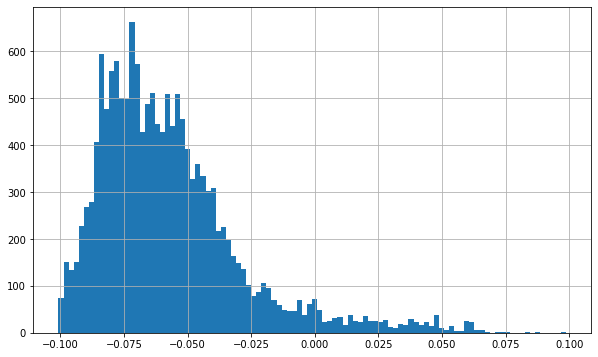

In [21]:
r['Anomaly_Score'].hist(bins=100, figsize=(10,6))